Here is an example of loading up the baseline simualtion and returning information about the visits that overlap a single point in the sky.

Installation instructions for rubin_sim can be found in the README at: https://github.com/lsst/rubin_sim

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils
from rubin_sim.data import get_baseline

In [2]:
# Grab the current baseline file. Should have been downloaded with rubin_sim. 
# Can grab lots of different sims from: http://astro-lsst-01.astro.washington.edu:8081/
baseline_file = get_baseline()
name = os.path.basename(baseline_file).replace('.db','')
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)

In [3]:
bundle_list = []
# The point on the sky we would like to get visits for
ra = [0.]
dec = [-20]


# Say we just want to pass data through, not compute anything. Documentation on the columns coming soon.
metric = maf.metrics.PassMetric(cols=['filter', 'observationStartMJD', 'fiveSigmaDepth'])
# Select all the visits
sql = ''
slicer = maf.slicers.UserPointsSlicer(ra=ra, dec=dec)
bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name))

In [4]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, out_dir=out_dir, results_db=results_db)
bg.run_all()


In [5]:
# Our bundleList now has values. The trailing [0] is to get the first result. If we specified more
# ra,dec point, those results would be in the later indices.
bundle_list[0].metric_values[0]

rec.array([('i', 105.5438157 , -21.40199934, 3.58669653e+02, 23.53705506, 63077.24779799),
           ('z', 148.61547835, -21.39965042, 3.58795587e+02, 23.04979756, 61686.07639785),
           ('y', 271.76787752, -21.31559264, 3.58988389e+02, 21.93141169, 63131.28601212),
           ('i', 148.61547835, -21.39965042, 3.58795587e+02, 23.53797343, 61686.05254425),
           ('y', 170.37853791, -21.65400137, 3.59821854e+02, 21.79369497, 63087.4007013 ),
           ('r', 169.27456213, -21.82328775, 3.59353255e+02, 23.41730112, 61058.04417192),
           ('i', 163.80251532, -21.31833345, 3.59676297e+02, 23.26455729, 62395.07582762),
           ('r', 172.83754472, -21.65400137, 3.59821854e+02, 23.37715788, 63087.40930279),
           ('z', 251.08949574, -21.55560892, 3.59745621e+02, 23.18528842, 62468.10340286),
           ('r',  58.72031126, -21.36204984, 3.59545990e+02, 24.44638033, 63835.20216099),
           ('r', 259.04773969, -21.31875977, 3.59610186e+02, 24.38962452, 60915.33961769),

Text(0.5, 1.0, 'baseline_v3.0_10yrs\nObservations at ra=0.000, dec=-20.000')

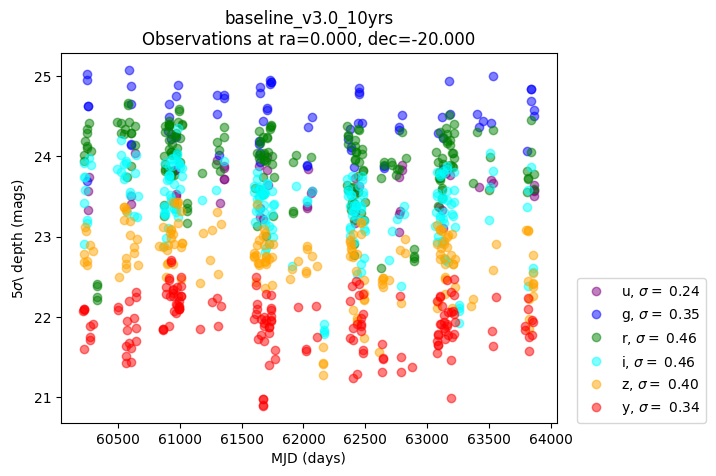

In [6]:
# As a bit of foreshadowing for how the rest of MAF works, we'll call the visits overlapping a
# single point in the sky "dataSlice". 
data_slice = bundle_list[0].metric_values[0]

# Let's plot up what the 5-sigma depth looks like
plt.figure()
# Give each filter it's own color
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
       'i': 'cyan', 'z': 'orange', 'y': 'red'}
for fn in f2c:
    in_filt = np.where(data_slice['filter'] == fn)[0]
    plt.plot(data_slice['observationStartMJD'][in_filt],
             data_slice['fiveSigmaDepth'][in_filt], 'o',
             color=f2c[fn],
             label=fn+r', $\sigma=$ %.2f' % (np.std(data_slice['fiveSigmaDepth'][in_filt])),
             alpha=0.5)
plt.xlabel('MJD (days)')
plt.ylabel(r'5$\sigma$\ depth (mags)')
plt.legend(loc=(1.04,0))
plt.title('%s\nObservations at ra=%.3f, dec=%.3f' % (name, ra[0],dec[0]))